# Importing Necessary Libraries

In [1]:
! pip install nltk

In [2]:
import pandas as pd
import numpy as np
import nltk
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset
## Elon_Musk_Tweets

In [3]:
df = pd.read_csv(r"C:\Users\ahmed\Downloads\Elon_musk.csv", encoding='latin-1', index_col=0)
df

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
df.reset_index(drop=True, inplace=True)

In [5]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
pd.set_option('display.max_colwidth', None)
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
...,...
1994,"@flcnhvy True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me https://t.co/WJRzIbKh1H"
1995,@PPathole Make sure to read ur terms &amp; conditions before clicking accept!
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>


# Convert Rows into Paragraph

In [7]:
txt = ' '.join(df['Text'])
txt

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [8]:
len(txt)

158805

In [9]:
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
def clean_paragraph(txt):
    # Convert to lowercase
    txt = txt.lower()
    
    # Remove special characters and punctuation
    txt = re.sub(r'[^a-zA-Z\s]', ' ', txt)
    
    # Remove numbers
    txt = re.sub(r'\d+', ' ', txt)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = txt.split()
    txt = ' '.join([word for word in words if word not in stop_words])
    
    return txt

In [11]:
clean_para = clean_paragraph(txt)
clean_para

'kunalb alien id aa carmack ray tracing cyberpunk hdr next level tried joerogan spotify great interview gtera doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox https co wfkmyu oj frodo underdoge thought would fail https co zgxjfdzzrm owensparks flcnhvy anonyx haha thanks flcnhvy anonyx indeed tweets definitely represent real world time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest https co rwe uhsts geoffkeighley unrealengine getting real bought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u f u f true power haha https co fc uhqsd freewalletorg crypto wallet give private keys avoided costs freewalletorg app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission https co pwt ajtourville yes blkmdl rationaletienne adamklotz pred

# Lemmatizing Paragraph

In [12]:
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('wordnet')

def lemmatize_paragraph(clean_para):
    # Tokenize the paragraph into words
    tokens = word_tokenize(clean_para)
    
    # Initialize WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize each word and join them back into a paragraph
    lemmatized_paragraph = ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens])
    
    return lemmatized_paragraph

# Function to map POS tag to first character lemmatize() accepts
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun if not found

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
lemmatized_para = lemmatize_paragraph(clean_para)

In [15]:
lemmatized_para

'kunalb alien id aa carmack ray trace cyberpunk hdr next level try joerogan spotify great interview gtera doge underestimated teslacn congratulation tesla china amaze execution last year next even happy new year ox http co wfkmyu oj frodo underdoge thought would fail http co zgxjfdzzrm owensparks flcnhvy anonyx haha thanks flcnhvy anonyx indeed tweet definitely represent real world time allocation entertain outcome likely givedirectly sent agree clubhouse kanyewest http co rwe uhsts geoffkeighley unrealengine get real bought dogecoin lil x toddler hodler joshmanmode definitely issue sentence seem bit high freewalletorg thanks fix freewalletorg please unlock account astrojordy u f u f true power haha http co fc uhqsd freewalletorg crypto wallet give private key avoid cost freewalletorg app suck rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission http co pwt ajtourville yes blkmdl rationaletienne adamklotz predict cash flow reasonably well starl

In [16]:
nlp = spacy.load('en_core_web_sm')

# Visualizing Text Entity

In [17]:
displacy.render(nlp(lemmatized_para), style='ent')

# WordCloud

In [18]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'WordCloud')

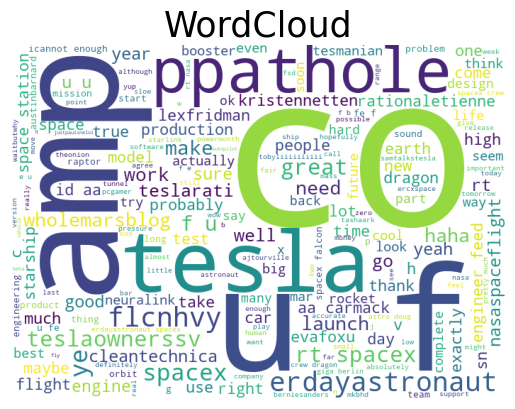

In [19]:
wc = WordCloud(background_color='white', width=700, height= 500).generate(lemmatized_para)
plt.imshow(wc)
plt.axis('off')
plt.title('WordCloud', size = 25)

# Sentiment Analysis

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis
sentiment_scores = sia.polarity_scores(lemmatized_para)

# Output sentiment scores
print("Sentiment Scores:", sentiment_scores)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment Scores: {'neg': 0.044, 'neu': 0.765, 'pos': 0.19, 'compound': 1.0}


In [21]:
# There are 76% Neutral Reviews and 19% positive reviews and very few negative ones

# Emotion Mining

# Getting Product Reviews From Amazon

In [22]:
# Product Name - Amazon Brand - Solimo Stainless Steel Insulated 24 Hours Hot or Cold Bottle Flask, 1000 ml, Silver

In [23]:
para = '''Pros:

Impressive Insulation: Maintains hot or cold temperatures for 24 hours.
Generous Capacity: 1000 ml size for ample liquid storage.
Sturdy Stainless Steel Build: Durable and resistant to wear and tear.
Leak-Proof Design: Ensures worry-free transportation without spills.
Sleek Aesthetics: Modern silver color adds a touch of style.

Cons:

Slightly Heavy: Stainless steel construction adds weight.
Limited Color Options: Available only in silver.
Large Size Compatibility: May not fit in standard cup holders.
Cap Cleaning: Cap design can be challenging to clean thoroughly.
Not Dishwasher Safe: Handwashing recommended, not dishwasher-friendly.

This product is very good. I am writing this review after using it. Water warm for 20 hours. Best product at this rate. Don't feel hesitate to buy this product.

The flask of 1000 ml capacity is well built, sleek, elegant in look and bottle shaped. Retains heat in water for nearly 24 hours as claimed. It's leak proof and condensation free. Whether catches rust can be commented only after a prolonged use. So far so good. Price of the product is lesser when compared to popular and established brands in the market.
Only negative aspect, as per me, is that the exterior of the lid is too smooth to grip for turning to open/close.
'Amazon Solimo' is gradually establishing its popularity as a brand for Amazon customers by marketing such products.

Solimo Stainless Steel Insulated Flask: A Reliable Company.Last year I purchased a 1000 ml bottle, after 15 days I purchased 5 bottles of different capacities for my husband,children and friends and till today all are working well.This product is amazing. Cheap and best.

I got it for 589 and in this price its good and keeps water hot for more than 12 Hours

Doesn't keep water warm for more than 4-5 hours, good with cold water. Other qualities are satisfactory.

Sustain the hot/cool -ness of the liquid for a reasonably long time. Good product at an affordable price.
Nice and robust product, with good steel quality, longer heat retention time, definitely go for it if you are getting at around 500 Rs.

Cheap product chinese made the hot vaccum lasted only 2 months. Now the hot water becomes normal in 15 minutes.'''

para

"Pros:\n\nImpressive Insulation: Maintains hot or cold temperatures for 24 hours.\nGenerous Capacity: 1000 ml size for ample liquid storage.\nSturdy Stainless Steel Build: Durable and resistant to wear and tear.\nLeak-Proof Design: Ensures worry-free transportation without spills.\nSleek Aesthetics: Modern silver color adds a touch of style.\n\nCons:\n\nSlightly Heavy: Stainless steel construction adds weight.\nLimited Color Options: Available only in silver.\nLarge Size Compatibility: May not fit in standard cup holders.\nCap Cleaning: Cap design can be challenging to clean thoroughly.\nNot Dishwasher Safe: Handwashing recommended, not dishwasher-friendly.\n\nThis product is very good. I am writing this review after using it. Water warm for 20 hours. Best product at this rate. Don't feel hesitate to buy this product.\n\nThe flask of 1000 ml capacity is well built, sleek, elegant in look and bottle shaped. Retains heat in water for nearly 24 hours as claimed. It's leak proof and conden

# Cleaning the Paragraph

In [24]:
def clean_paragraph(para):
    # Convert to lowercase
    para = para.lower()
    
    # Remove special characters and punctuation
    para = re.sub(r'[^a-zA-Z\s]', ' ', para)
    
    # Remove numbers
    para = re.sub(r'\d+', ' ', para)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = para.split()
    para = ' '.join([word for word in words if word not in stop_words])
    
    return para

In [25]:
clean_para = clean_paragraph(para)
clean_para

'pros impressive insulation maintains hot cold temperatures hours generous capacity ml size ample liquid storage sturdy stainless steel build durable resistant wear tear leak proof design ensures worry free transportation without spills sleek aesthetics modern silver color adds touch style cons slightly heavy stainless steel construction adds weight limited color options available silver large size compatibility may fit standard cup holders cap cleaning cap design challenging clean thoroughly dishwasher safe handwashing recommended dishwasher friendly product good writing review using water warm hours best product rate feel hesitate buy product flask ml capacity well built sleek elegant look bottle shaped retains heat water nearly hours claimed leak proof condensation free whether catches rust commented prolonged use far good price product lesser compared popular established brands market negative aspect per exterior lid smooth grip turning open close amazon solimo gradually establishi

# Emotion Mining

In [26]:
! pip install textblob

                                              0.0/626.3 kB ? eta -:--:--
     --                                    41.0/626.3 kB 991.0 kB/s eta 0:00:01
     -----------                            194.6/626.3 kB 2.4 MB/s eta 0:00:01
     -----------------------------------    583.7/626.3 kB 5.3 MB/s eta 0:00:01
     -------------------------------------- 626.3/626.3 kB 4.4 MB/s eta 0:00:00
                                              0.0/1.5 MB ? eta -:--:--
     --------------                           0.5/1.5 MB 16.3 MB/s eta 0:00:01
     -------------------------------          1.2/1.5 MB 14.8 MB/s eta 0:00:01
     ---------------------------------------  1.5/1.5 MB 13.5 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 10.6 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [27]:
from textblob import TextBlob

# Perform sentiment analysis
blob = TextBlob(clean_para)
sentiment = blob.sentiment

# Determine the emotion based on sentiment polarity
if sentiment.polarity > 0:
    emotion = "Positive"
elif sentiment.polarity < 0:
    emotion = "Negative"
else:
    emotion = "Neutral"

# Output emotion
print("Emotion:", emotion)

Emotion: Positive


In [28]:
# Hence we recieved a positive emotion from the customers

In [29]:
#Lets see the magnitude by which the product is positive

In [30]:

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
sentiment_scores = sia.polarity_scores(clean_para)

# Output sentiment scores
print("Sentiment Scores:", sentiment_scores)

Sentiment Scores: {'neg': 0.052, 'neu': 0.633, 'pos': 0.315, 'compound': 0.9971}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
# There are 63% Neutral Reviews and 33% positive reviews and very few negative ones. Having Overall positive Reviews

# Wordcloud

Text(0.5, 1.0, 'WordCloud')

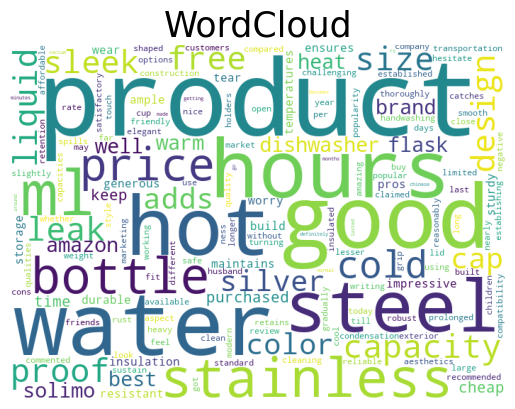

In [32]:
wc = WordCloud(background_color='white', width=700, height= 500).generate(clean_para)
plt.imshow(wc)
plt.axis('off')
plt.title('WordCloud', size = 25)

In [ ]:
# We can see the word Good is Highlighted with a good font size, which implicates good product.